In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Global Graph Sizing

from pylab import rcParams
#rcParams['figure.figsize'] = 12,5

In [ ]:
#Load Data

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/airline_passengers.csv', index_col = 'Month', parse_dates = True)

df.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

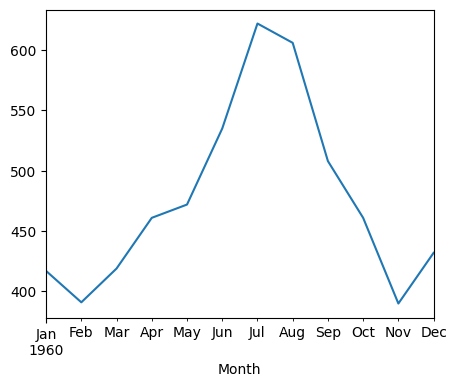

In [ ]:
#Q1

df['Thousands of Passengers']['1960'].plot(figsize=(5,4))

<Axes: xlabel='Month'>

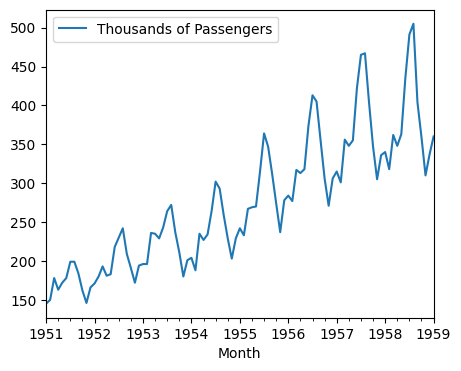

In [ ]:
#Q2
df['1951-01-01' : '1959-01-01'].plot(figsize = (5,4))

<Axes: xlabel='Month'>

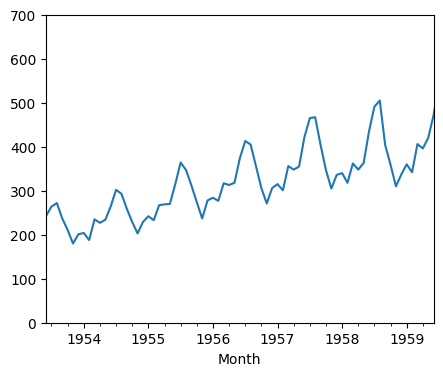

In [ ]:
#Q3
df['Thousands of Passengers'].plot(figsize = (5,4), xlim=['1953-06-01','1959-06-01'],ylim=[0,700])

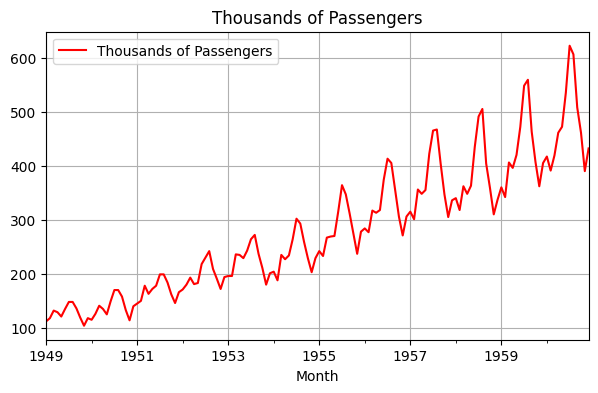

In [ ]:
#Q4
title = 'Thousands of Passengers'
df.max()
df.plot(figsize = (7,4), color = 'red', title = title).grid()

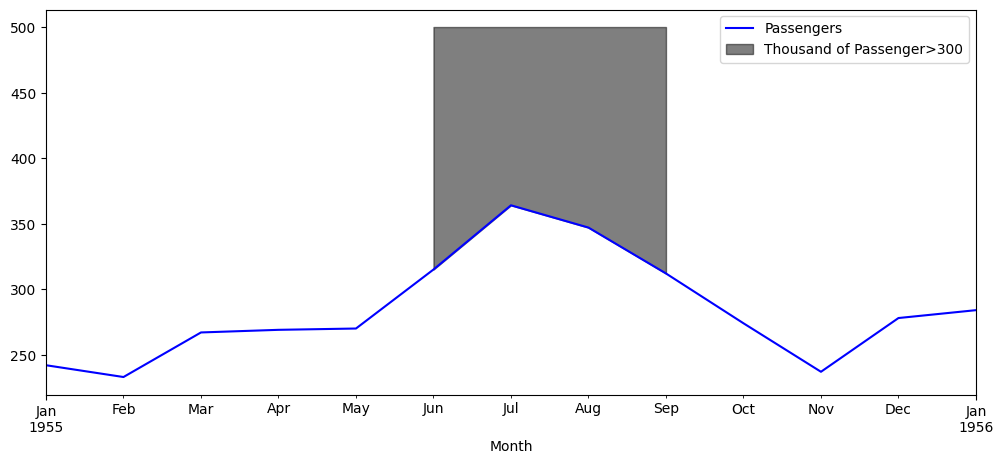

In [ ]:
#Q5
filtered_df = df.loc['1955-01-01':'1956-01-01']
condition = filtered_df['Thousands of Passengers']>300
ax = filtered_df['Thousands of Passengers'].plot(label='Passengers',color='blue', figsize = (12,5))
ax.fill_between(filtered_df.index, 500, filtered_df['Thousands of Passengers'], where = condition, color = 'black', alpha = 0.5, label='Thousand of Passenger>300')
ax.legend(loc = 'upper right')

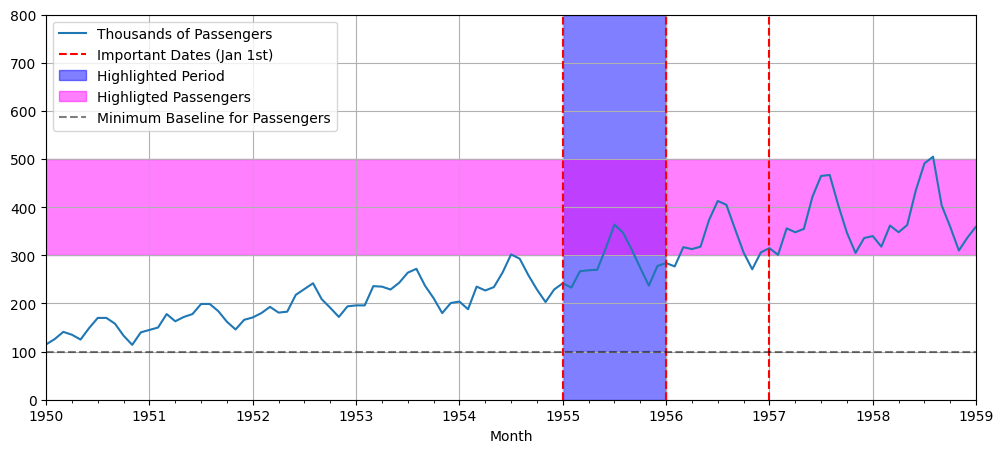

In [ ]:
#q5
important_dates = pd.to_datetime(['1955-01-01', '1956-01-01', '1957-01-01'])

ax = df['Thousands of Passengers'].plot(xlim = ['1950-01-01', '1959-01-01'], ylim = [0, 800], figsize = (12, 5)) # Line Graph with Limits

for day in important_dates:

    ax.axvline(day, color = 'red', linestyle = '--', label = 'Important Dates (Jan 1st)' if day == important_dates[0] else "")

ax.axvspan('1955', '1956', color='blue', alpha = 0.5, label = 'Highlighted Period') # Vertical Span
ax.axhspan(300, 500, color = 'magenta', alpha = 0.5, label = 'Highligted Passengers') # Horizontal Span
ax.axhline(100, color = 'black', alpha = 0.5, label = 'Minimum Baseline for Passengers', linestyle = '--') # Horizontal Line

ax.legend()
ax.grid(True)

<Axes: xlabel='Month'>

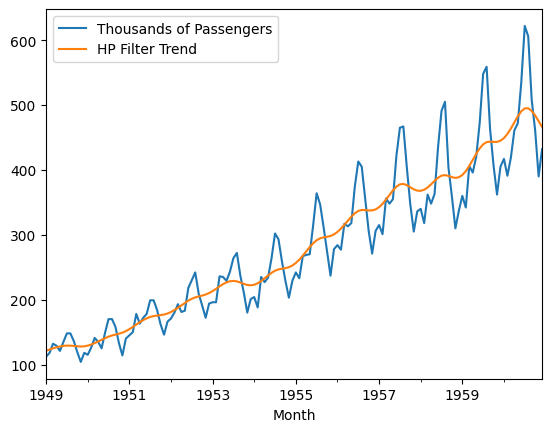

In [ ]:
#Q6
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Thousands of Passengers'], lamb=100)
gdp_cycle
df['HP Filter Trend'] = gdp_trend
df[['Thousands of Passengers','HP Filter Trend']].plot()

In [ ]:
#QUESTION NO. 7

trend_value_1960_12_01 = df.loc['1960-12-01', 'HP Filter Trend']
print(f'Trend value for 1960-12-01: {trend_value_1960_12_01:.2f}')

Trend value for 1960-12-01: 466.29


In [ ]:
#QUESTION NO. 8
cycle_value_1955_12_01 = gdp_cycle['1955-12-01']
print(f"The cycle value for 1955-12-01 is: {cycle_value_1955_12_01:.2f}")

The cycle value for 1955-12-01 is: -22.65


<ipython-input-19-a884c04903f6>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pdf = df['1949']


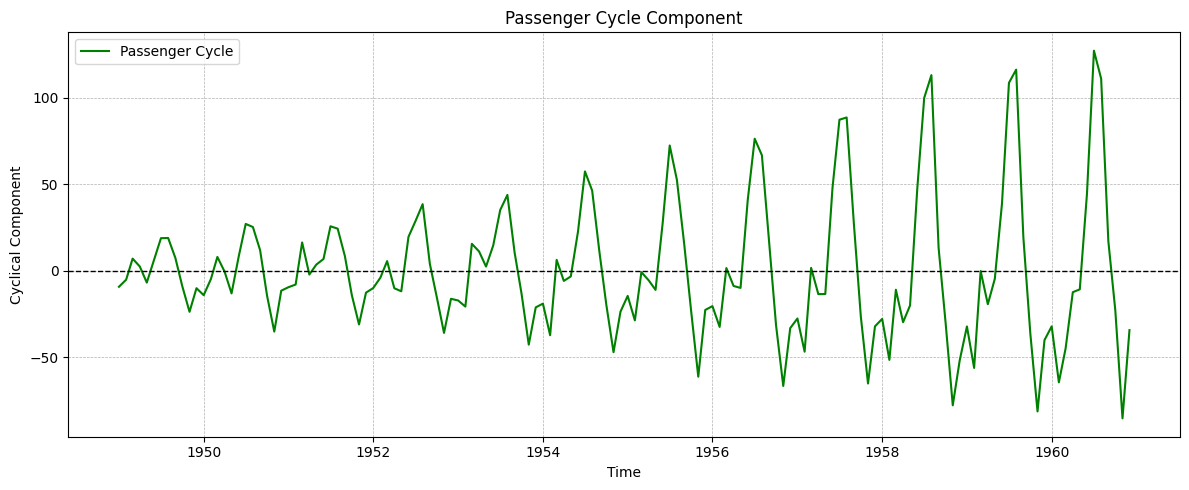

In [ ]:
#Q9
#QUESTION NO. 9
# GRAPH THE CYCLE
import statsmodels.api as sm
pdf = df['1949']
lamb = 100
cycle, trend = sm.tsa.filters.hpfilter(df['Thousands of Passengers'], lamb=lamb)

plt.figure(figsize=(12, 5))
plt.plot(df.index, cycle, label='Passenger Cycle', color='green', linewidth=1.5)
plt.title('Passenger Cycle Component')
plt.xlabel('Time')
plt.ylabel('Cyclical Component')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid lines
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adding bold line at 0
plt.tight_layout()
plt.show()

<Axes: xlabel='Month'>

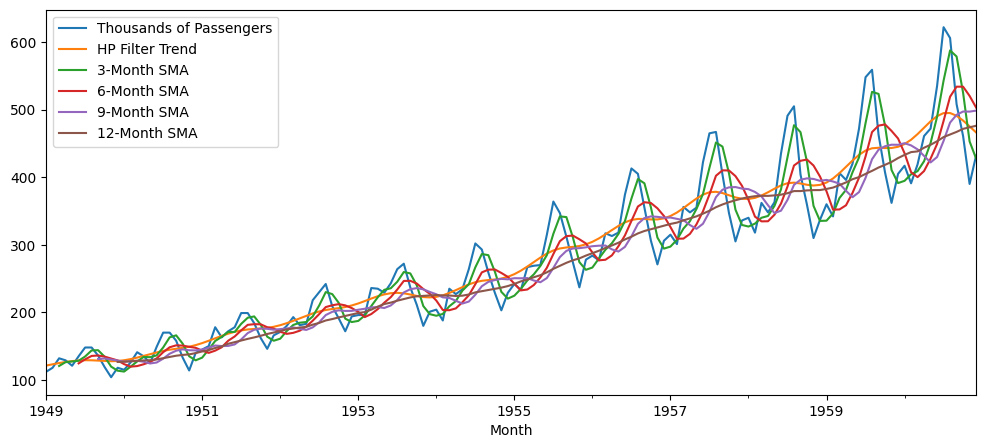

In [ ]:
#Q11
# Global Graph Sizing

df['3-Month SMA'] = df['Thousands of Passengers'].rolling(window=3).mean()
df['6-Month SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['9-Month SMA'] = df['Thousands of Passengers'].rolling(window=9).mean()
df['12-Month SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()
df[['Thousands of Passengers', 'HP Filter Trend','3-Month SMA','6-Month SMA','9-Month SMA','12-Month SMA']].plot(figsize=(12, 5))

In [ ]:
#Q12
# WHAT IS THE 6-MONTH SMA VALUE DURING '1956-01-01'?
six = df['6-Month SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
six['1956-01-01']

288.6666666666667

In [ ]:
#Q13
# WHAT IS THE 12-MONTH SMA VALUE DURING '1954-01-01'?
twelve = df['6-Month SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()
twelve['1954-01-01']

225.66666666666666